In [1]:
import fantasy as fp
# noinspection PyUnresolvedReferences
from fantasyalgo import best_subset
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
data = pd.read_excel('18-01-2023.xlsx', index_col=0)

In [12]:
data.shape

(4184, 6)

In [13]:
data = data.loc[~data['event'].str.contains("ESL Pro League")]
data.shape

(3965, 6)

In [14]:
data.head(10)

,player,event,avg rank,all events rating,big events rating,pts
0,karrigan,IEM Dallas 2022,15.812000,0.91,0.89,-49
1,karrigan,PGL Major Antwerp 2022,11.250000,0.91,0.89,67
2,karrigan,BLAST Premier Spring Groups 2022,33.272999,0.91,0.89,-46
3,karrigan,BLAST Premier Spring Final 2022,10.500000,0.91,0.89,-34
4,karrigan,BLAST Premier Fall Groups 2022,29.083000,0.91,0.89,-50
5,karrigan,IEM Katowice 2022 Play-In,21.000000,0.91,0.89,-1
6,karrigan,BLAST Premier Fall Final 2022,11.750000,0.91,0.89,3
7,karrigan,BLAST Premier World Final 2022,7.125000,0.91,0.89,-43
8,karrigan,Roobet Cup 2022,17.125000,0.91,0.89,-34
9,karrigan,PGL Major Antwerp 2022 Europe RMR A,29.750000,0.91,0.89,28


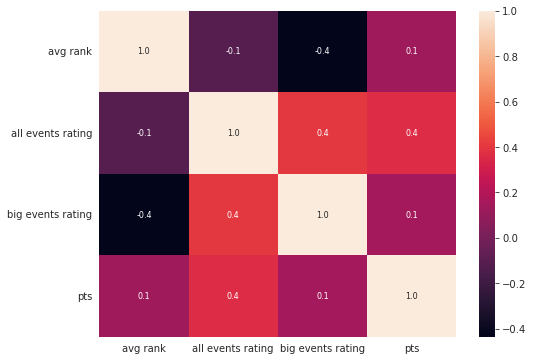

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(method='spearman'), annot=True, annot_kws={"fontsize":8}, fmt=".1f");

In [32]:
set_first = data.drop(columns=['big events rating', 'player', 'avg rank', 'event', 'pts']).to_numpy()
pts = data['pts'].to_numpy()

In [20]:
event = fp.Event(6970)
players = event.get_players()
len(players)

60

In [22]:
costs_data = event.get_costs("costs_data.html")
len(costs_data)

55

In [23]:
for p in players:
    if p.name not in list(costs_data.keys()):
        name = f"{p.name}-"
        if name in list(costs_data.keys()):
            p.name = name
            print(p.name)

hunter-


In [24]:
costs = []
keys = list(costs_data.keys())
not_found = []

cnt = 0
for p in players:
    if p.name in keys:
        costs.append(costs_data[p.name])
    else:
        not_found.append(cnt)
    cnt += 1
len(costs)

55

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=1)
model.fit(set_first, pts)

LinearRegression()

In [42]:
predicted = []
rank = event.rank

for p in players:
    all_rating = p.get_stats(dt.date.today() - dt.timedelta(days=90), dt.date.today(), fp.EventFilter.ALL)
    vector = np.array([[all_rating]])
    predicted.append(float(model.predict(vector)[0]))
len(predicted)

60

In [43]:
cnt = 0
names = list(costs_data.keys())


for p in players:
    if p.name not in names:
        print(cnt)
    cnt += 1

55
56
57
58
59


In [44]:
for _ in range(5):
    predicted.pop(55)

In [45]:
len(predicted)

55

In [46]:
ss = best_subset(predicted, costs)

In [47]:
ss

[20, 31, 33, 38, 51]

In [48]:
for i in ss:
    print(players[i].name)

s1mple
neofrag
degster
faven
floppy
